In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # charts plotting
import plotly.graph_objects as go # more customized plotting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_retail = pd.read_csv('/content/drive/MyDrive/Spinmaster/OnlineRetail.csv')
df_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


In [ ]:
df_retail.shape

(541909, 8)

In [ ]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Observations 1 <br>
a. InvoiceDate is date type data but has object as DType so needs to be converted to datetime <br>
b. Most columns have 541909 rows except Description and CustomerID which has less than this. So they both have missing rows. Need to drop customerID rows with missing values as it is important feature for model but description may not be used <br>
c. CustomerID has float64 dtype while it is good with int64 <br>
d. We can also add a column for total price which can be handy to use <br>

In [ ]:
# Initial Cleanup
df_retail['InvoiceDate_DT'] = pd.to_datetime(df_retail['InvoiceDate'])
df_retail = df_retail[df_retail['CustomerID'].notna()]
df_retail['CustomerID'] = df_retail['CustomerID'].astype(int)
df_retail = df_retail.sort_values('InvoiceDate_DT')
df_retail['Total'] = df_retail['Quantity'] * df_retail['UnitPrice']
df_retail.head(5)

<ipython-input-7-5554d0824f1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retail['CustomerID'] = df_retail['CustomerID'].astype(int)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_DT,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,20.34


In [ ]:
df_retail["Country"].value_counts()

,count
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480


In [ ]:
# Overall statistics of Data - All Countries
df_retail.describe()

,Quantity,UnitPrice,CustomerID,InvoiceDate_DT,Total
count,406829.000000,406829.000000,406829.000000,406829,406829.000000
mean,12.061303,3.460471,15287.690570,2011-07-10 16:30:57.879207424,20.401854
min,-80995.000000,0.000000,12346.000000,2010-12-01 08:26:00,-168469.600000
25%,2.000000,1.250000,13953.000000,2011-04-06 15:02:00,4.200000
50%,5.000000,1.950000,15152.000000,2011-07-31 11:48:00,11.100000
75%,12.000000,3.750000,16791.000000,2011-10-20 13:06:00,19.500000
max,80995.000000,38970.000000,18287.000000,2011-12-09 12:50:00,168469.600000
std,248.693370,69.315162,1713.600303,NaN,427.591718


In [ ]:
# Overall statistics of UK data
df_uk = df_retail.loc[df_retail["Country"]== "United Kingdom"]
df_uk.describe()

,Quantity,UnitPrice,CustomerID,InvoiceDate_DT,Total
count,361878.000000,361878.000000,361878.000000,361878,361878.000000
mean,11.077029,3.256007,15547.871368,2011-07-10 23:48:12.301493760,18.702086
min,-80995.000000,0.000000,12346.000000,2010-12-01 08:26:00,-168469.600000
25%,2.000000,1.250000,14194.000000,2011-04-06 17:25:00,3.750000
50%,4.000000,1.950000,15514.000000,2011-07-31 13:07:00,10.200000
75%,12.000000,3.750000,16931.000000,2011-10-23 11:39:00,17.700000
max,80995.000000,38970.000000,18287.000000,2011-12-09 12:49:00,168469.600000
std,263.129266,70.654731,1594.402590,NaN,451.918484


# A. Price distribution across Products (UK)

In [ ]:
# A1.Max price distribution by product
most_expensive = df_uk.loc[df_uk["UnitPrice"] == df_uk["UnitPrice"].max()]
df_max_price_agg = most_expensive.groupby(["Description","UnitPrice"], as_index=False)["Quantity"].agg("sum").nlargest(10,"Quantity")
df_max_price_agg

,Description,UnitPrice,Quantity
0,Manual,38970.0,-1


We can see that the most expensive product in the dataset has a weird description 'Manual' and is priced at £38970.0. It is interesting that the quantity is -1; looks like someone returned an item priced that high or did not pay for it yet.

In [ ]:
# A2. Least Expensive price distribution by product
least_expensive = df_uk.loc[df_uk["UnitPrice"] == df_uk["UnitPrice"].min()]
df_min_price_agg = least_expensive.groupby(["Description","UnitPrice"], as_index=False)["Quantity"].agg("sum").nlargest(10,"Quantity")
df_min_price_agg

,Description,UnitPrice,Quantity
2,ASSTD DESIGN 3D PAPER STICKERS,0.0,12540
3,CERAMIC BOWL WITH LOVE HEART DESIGN,0.0,36
15,PAPER BUNTING RETROSPOT,0.0,24
16,PAPER BUNTING VINTAGE PAISLEY,0.0,24
19,PLASTERS IN TIN SKULLS,0.0,24
21,SET OF 9 BLACK SKULL BALLOONS,0.0,20
6,FAIRY CAKES NOTEBOOK A6 SIZE,0.0,16
5,CHRISTMAS PUDDING TRINKET POT,0.0,12
10,MINI CAKE STAND HANGING STRAWBERY,0.0,5
18,PASTEL COLOUR HONEYCOMB FAN,0.0,5


In [ ]:
# A3. Minimum price distribution - Non Zero
retail_non_zero_price = df_uk.loc[df_uk['UnitPrice'] != 0]
df_min_price_agg = retail_non_zero_price.groupby(["Description","UnitPrice"], as_index=False)["Quantity"].agg("sum").nlargest(10,"Quantity")
df_min_price_agg

,Description,UnitPrice,Quantity
8662,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.29,23015
8661,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.21,22080
5920,POPCORN HOLDER,0.72,21682
423,ASSORTED COLOUR BIRD ORNAMENT,1.69,20543
3941,JUMBO BAG RED RETROSPOT,1.79,16826
8438,WHITE HANGING HEART T-LIGHT HOLDER,2.55,16170
7418,SMALL CHINESE STYLE SCISSOR,0.32,12620
7488,SMALL POPCORN HOLDER,0.72,12494
5272,PACK OF 72 RETROSPOT CAKE CASES,0.55,12144
422,ASSORTED COLOUR BIRD ORNAMENT,1.45,12136


Cheapest products are mostly some design items or ornaments/art collections

# B. Customers Analysis and most valueable customers

In [ ]:
retail_customers = df_retail.groupby(['CustomerID', 'Country'], as_index=False)['Total'].agg('sum')
retail_customers_asc = retail_customers.sort_values('Total').head(10)
retail_customers_desc = retail_customers.sort_values('Total', ascending=False).head(10)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Customers With Max Total Purchase Amount',
           x=retail_customers_desc['CustomerID'].astype(str),
           y=retail_customers_desc['Total'],
           marker_opacity=1,
           hovertext=retail_customers_desc['Country'],
           marker={'color': retail_customers_desc['Total'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_traces(texttemplate='£%{y:.3s}', textposition='inside')

fig.update_layout(title='Customers With Max Total Purchase Amount',
                  title_x=0.45,
                  xaxis_title="Customer ID",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Customers With Min Total Purchase Amount',
           x=retail_customers_asc['CustomerID'].astype(str),
           y=retail_customers_asc['Total'],
           marker_opacity=1,
           hovertext=retail_customers_desc['Country'],
           marker={'color': retail_customers_desc['Total'],
                   'colorscale': 'Rainbow'}
          )
    ])
fig.update_xaxes(side="top")

fig.update_traces(texttemplate='£%{y:.3s}', textposition='inside')

fig.update_layout(title='Customers With Min Total Purchase Amount',
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Customer ID",
                  yaxis_title="Total Amount Returned, £",
                  plot_bgcolor='white')
fig.show()

Customer with ID 14646 has spent most money in our online store during two years. He/she comes from Netherlands, and has paid in total £279k. Another customer from UK comes close to that number - has spent £256k. In general the top 10 consists of customers from UK, EIRE, Netherlands and Australia - all countries with mature economies.

On the chart showing customers who spent the least, we can see only negative numbers. From our dataset alone, it seems that those are returns. The largest total negative sum is £4.3k, and the customer with this returned amount comes from Netherlands as well. It is curious that in general customers who have largest negative values here come from the same countries as customers who have paid most.

# C. Country analysis by Total Purchase Amount

In [ ]:
retail_countries_purchase = df_retail.groupby(['Country'], as_index=False)['Total'].agg('sum')
retail_countries_purchase_asc = retail_countries_purchase.sort_values('Total').head(10)
retail_countries_purchase_desc = retail_countries_purchase.sort_values('Total', ascending=False).head(10)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Countries With Max Total Purchase Amount',
           x=retail_countries_purchase_desc['Country'].astype(str),
           y=retail_countries_purchase_desc['Total'],
           marker_opacity=1,
           marker={'color': retail_countries_purchase_desc['Total'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_traces(texttemplate='£%{y:.3s}', textposition='outside')

fig.update_layout(title='Countries With Max Total Purchase Sum',
                  title_x=0.45,
                  xaxis_title="Countries",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Countries With Min Total Purchase Amount',
           x=retail_countries_purchase_asc['Country'].astype(str),
           y=retail_countries_purchase_asc['Total'],
           marker_opacity=1,
           marker={'color': retail_countries_purchase_desc['Total'],
                   'colorscale': 'Rainbow'}
          )
    ])

fig.update_traces(texttemplate='£%{y:.3s}', textposition='inside')

fig.update_layout(title='Countries With Min Total Purchase Amount',
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Countries",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

If we look at the top 10 countries, where maximal purchase totals originate from, it is very clear that United Kingdom is a leader with purchase amount of £6.7M. The closest amount to that is £285k - that much was purchased by EIRE customers. It is 23 times less! One other interesting insight is that all countries in the top ten are located in Europe except Australia.

The country with the smallest purchase value is Saudi Arabia. Customers from Saudi Arabia have spent only £131 in the online shop in two years! While generally countries with smaller purchased amounts are situated outside of Europe, there is an interesting exception: Czech Republic. If I had more data, I would love to dig deeper into the reasons of this fact!

# D. Country Analysis by Customer Count

In [ ]:
retail_countries_customers = df_retail.groupby(['Country'], as_index=False)['CustomerID'].agg({'CustomerID': 'nunique'})
retail_countries_customers.rename(columns={'CustomerID': 'Customer Count'}, inplace=True)
retail_countries_customers_asc = retail_countries_customers.sort_values('Customer Count').head(10)
retail_countries_customers_desc = retail_countries_customers.sort_values('Customer Count', ascending=False).head(10)

<ipython-input-32-a85377be775e>:1: FutureWarning:

Passing a dictionary to SeriesGroupBy.agg is deprecated and will raise in a future version of pandas. Pass a list of aggregations instead.



In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Countries with Largest Number of Unique Customers',
           x=retail_countries_customers_desc['Country'].astype(str),
           y=retail_countries_customers_desc['Customer Count'],
           marker_opacity=1,
           marker={'color': retail_countries_customers_desc['Customer Count'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_traces(texttemplate='%{y:.3s}', textposition='outside')

fig.update_layout(title='Countries with Largest Number of Unique Customers',
                  title_x=0.45,
                  xaxis_title="Countries",
                  yaxis_title="Number of Unique Customers",
                  plot_bgcolor='white')
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Countries with Smallest Number of Unique Customers',
           x=retail_countries_customers_asc['Country'].astype(str),
           y=retail_countries_customers_asc['Customer Count'],
           marker_opacity=1,
           marker={'color': retail_countries_customers_desc['Customer Count'],
                   'colorscale': 'Rainbow'}
          )
    ])

fig.update_traces(texttemplate='%{y:.3s}', textposition='outside')

fig.update_layout(title='Countries with Smallest Number of Unique Customers',
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Countries",
                  yaxis_title="Number of Unique Customers",
                  plot_bgcolor='white')
fig.show()

In UK, 3.95k of unique customers have made purchases in two years, while Germany and France follow up with only 95 customers and 87 customers respectively. The difference between top position and the followers is indeed huge. Note that we have spotted the similar trend while analysing purchases for each country.
Also there are many countries with a single unique customer, such as Brazil, Iceland, Saudi Arabia etc. Here, Czech Republic is again an outlier in the list of Asian, South American and African countries, but now we see that also Lithuania and Iceland have only one customer. While Iceland has a relatively small population, it would be interesting to investigate and compare the reasons for Czech Republic and Lithuania.

# E. Product Analysis by Quantity (UK)

In [ ]:
retail_products = df_uk.groupby(['Description'], as_index=False)['Quantity'].agg('sum')
retail_products = retail_products.loc[~retail_products['Description'].isin(['CRUK Commission', 'Discount'])]
retail_products_asc = retail_products.sort_values('Quantity').head(10)
retail_products_asc['Quantity'] = retail_products_asc['Quantity'] * (-1)
retail_products_desc = retail_products.sort_values('Quantity', ascending=False).head(10)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='10 Bestselling Products',
           x=retail_products_desc['Description'].astype(str),
           y=retail_products_desc['Quantity'],
           marker_opacity=1,
           marker={'color': retail_products_desc['Quantity'],
                   'colorscale': 'Rainbow'})
    ])

fig.update_traces(texttemplate='%{y:.3s}', textposition='outside')
fig.update_layout(barmode='group', showlegend=False)

fig.update_layout(title='10 Bestselling Products',
                  title_x=0.45,
                  xaxis_title="Products",
                  yaxis_title="Total Quantity Sold",
                  plot_bgcolor='white')
fig.show()

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='10 Products With Most Returns',
           x=retail_products_asc['Description'].astype(str),
           y=retail_products_asc['Quantity'],
           marker_opacity=1,
           marker={'color': retail_products_desc['Quantity'],
                   'colorscale': 'Rainbow'}
          )
    ])

fig.update_traces(texttemplate='%{y:.3s}', textposition='outside')
fig.update_layout(barmode='group', showlegend=False)

fig.update_layout(title='10 Products With Most Returns',
                  title_x=0.45,
                  title_y=0.97,
                  xaxis_title="Products",
                  yaxis_title="Total Quantity Returned",
                  plot_bgcolor='white')
fig.show()

We can see that World War II Gliders are clear bestsellers (the store has sold 48k of them in last year). However quite utilitary things also sell pretty well: mostly in the top ten different holders and cake cases prevail. Also a purse and a popcorn holder can be found there.

The product with most returns is Silver angels T-light (1.85k of them were returned in the last year). It is interesting that many decor items and gifts have made it to this list: various candles, flasks, pots, magnets and lights are here.

# F. Cohort Analysis (UK)

Cohort analysis is generally used to show behavious of users, or in our case, customers, over time. It is an incredibly useful instrument to find some insights about customer experiences, and to understand how to improve that. <br>
I will use cohort analysis to investigate retention rate and average amount of products sold, and choose to use quarters of the year to define my cohorts. I will start by slightly transforming my data.

In [ ]:
df_uk["CustomerID"].value_counts()

,count
CustomerID,
17841,7983
14096,5128
12748,4642
14606,2782
15311,2491
...,...
15070,1
13017,1
18184,1


In [ ]:
retail = df_uk.copy()
# retail = df_uk[df_uk['InvoiceDate_DT'].dt.year != 2010]
retail['InvoiceQuarter'] = ('Q' + retail['InvoiceDate_DT'].dt.quarter.astype(str) +
                            '/' + retail['InvoiceDate_DT'].dt.year.astype(str))
quarters_map = dict(zip(retail['InvoiceQuarter'].unique(),
                        range(len(retail['InvoiceQuarter'].unique()))))
retail['InvoiceQuarterID'] = retail['InvoiceQuarter'].map(quarters_map)
retail['CohortQuarterID'] = retail.groupby('CustomerID')['InvoiceQuarterID'].transform('min')
retail['CohortQuarter'] = retail['CohortQuarterID'].map(dict(zip(quarters_map.values(), quarters_map.keys())))
retail['CohortIndex'] = retail['InvoiceQuarterID'] - retail['CohortQuarterID']
retail.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_DT,Total,InvoiceQuarter,InvoiceQuarterID,CohortQuarterID,CohortQuarter,CohortIndex
467625,576362,85099B,JUMBO BAG RED RETROSPOT,10,2011-11-14 17:11,2.08,14755,United Kingdom,2011-11-14 17:11:00,20.80,Q4/2011,4,1,Q1/2011,3
471789,576650,23194,GYMKHANA TREASURE BOOK BOX,8,2011-11-16 10:34,2.25,14286,United Kingdom,2011-11-16 10:34:00,18.00,Q4/2011,4,2,Q2/2011,2
12413,537376,22141,CHRISTMAS CRAFT TREE TOP ANGEL,6,2010-12-06 12:59,2.10,16722,United Kingdom,2010-12-06 12:59:00,12.60,Q4/2010,0,0,Q4/2010,0
8496,537137,21155,RED RETROSPOT PEG BAG,2,2010-12-05 12:43,2.10,16327,United Kingdom,2010-12-05 12:43:00,4.20,Q4/2010,0,0,Q4/2010,0
139498,548324,22568,FELTCRAFT CUSHION OWL,48,2011-03-30 13:01,3.39,13316,United Kingdom,2011-03-30 13:01:00,162.72,Q1/2011,1,1,Q1/2011,0


In [ ]:
retail["CohortIndex"].value_counts()

,count
CohortIndex,
0,124059
1,74053
2,65194
3,59580
4,38992


In [ ]:
cohort_retention = retail.groupby(['CohortQuarterID', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_retention.rename(columns={'CustomerID': 'Customer Count'}, inplace=True)
cohort_retention_count = cohort_retention.pivot_table(index='CohortQuarterID',
                                                      columns='CohortIndex',
                                                      values='Customer Count')
cohort_retention_count['CohortQuarter'] = cohort_retention_count.index.map(dict(zip(quarters_map.values(),
                                                                                    quarters_map.keys())))
cohort_retention_count = cohort_retention_count.set_index('CohortQuarter')
cohort_size = cohort_retention_count.iloc[:, 0]
retention = cohort_retention_count.divide(cohort_size, axis = 0)
retention = (retention*100).round(2)
retention = retention.iloc[::-1]

In [ ]:
fig = go.Figure(data=go.Heatmap(
                    z=retention,
                    y=retention.index,
                    colorscale='Greens',
                    text=retention,
                    texttemplate = "%{text}%",
                    colorbar_title='Retention Rate, %',
                    xgap=3,
                    ygap=3))

fig.update_xaxes(side="top")

fig.update_layout(title="Cohort Analysis: Retention Rate",
                  xaxis_title="Cohorts",
                  yaxis_title="Quarters",

                  title_x=0.5,
                  title_y=0.99,
                  plot_bgcolor='white')
fig.show()

# G. Cohort Analysis for average quantity sold

In [ ]:
cohort_quantity = retail.groupby(['CohortQuarterID', 'CohortIndex'])['Quantity'].mean().reset_index()
cohort_quantity.rename(columns={'Quantity': 'Average Quantity'}, inplace=True)
average_quantity  = cohort_quantity.pivot_table(index = 'CohortQuarterID',
                                                columns = 'CohortIndex',
                                                values = 'Average Quantity').round(1)
average_quantity['CohortQuarter'] = average_quantity.index.map(dict(zip(quarters_map.values(),
                                                                        quarters_map.keys())))
average_quantity = average_quantity.set_index('CohortQuarter')
average_quantity = average_quantity.iloc[::-1]

In [ ]:
fig = go.Figure(data=go.Heatmap(
                    z=average_quantity,
                    y=average_quantity.index,
                    colorscale='Blues',
                    text=average_quantity,
                    texttemplate = "%{text}",
                    colorbar_title='Average Quantity',
                    xgap=3,
                    ygap=3))

fig.update_xaxes(side="top")

fig.update_layout(title="Cohort Analysis: Average Quantity",
                  xaxis_title="Cohorts",
                  yaxis_title="Quarters",

                  title_x=0.5,
                  title_y=0.99,
                  plot_bgcolor='white')
fig.show()

# H. Sales by Quarters 2010 Q4 - 2011 Q4

In [ ]:
retail_quarters_by_sales = retail.groupby(['InvoiceQuarterID'], as_index=False)['Total'].agg('sum')
retail_quarters_by_sales['InvoiceQuarter'] = retail_quarters_by_sales['InvoiceQuarterID'].map(dict(zip(quarters_map.values(),
                                                                                                               quarters_map.keys())))

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Quarterly Sales',
           x=retail_quarters_by_sales['InvoiceQuarter'],
           y=retail_quarters_by_sales['Total'],
           marker_opacity=1,
           text='Total',
           marker={'color': retail_quarters_by_sales['Total'],
                   'colorscale': 'Portland'}
          )
    ])

fig.update_traces(texttemplate='%{text}: £%{y:.3s}', textposition='outside')
fig.update_layout(barmode='group', showlegend=False)

fig.update_layout(title="Quarterly Sales",
                  title_x = 0.45,
                  xaxis_title="Quarters",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

We can notice that the trend is increasing each quarter

In [ ]:
retail_monthly = retail.copy()
retail_monthly['InvoiceMonth'] = retail_monthly['InvoiceDate_DT'].dt.to_period('M')
retail_monthly_by_sales = retail_monthly.groupby(['InvoiceMonth'], as_index=False)['Total'].agg('sum')

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Monthly Sales',
           x=retail_monthly_by_sales['InvoiceMonth'].astype(str),
           y=retail_monthly_by_sales['Total'],
           marker_opacity=1,
           marker={'color': retail_monthly_by_sales['Total'],
                   'colorscale': 'Portland'}
          )
    ])

fig.update_layout(barmode='group', showlegend=False)

fig.update_layout(title="Monthly Sales",
                  title_x = 0.45,
                  xaxis_title="Months",
                  yaxis_title="Total Amount, £",
                  plot_bgcolor='white')
fig.show()

Also with a more precise breakdown we can easily detect the sales peaks around November and we don't have complete data for December 2011. However we have complete data for Dec 2010 and it shows a dip from Dec2010 to Jan 2011.

# I. Target Group - UK and top 20 Items in Revenue

In [ ]:
df_uk.shape

(361878, 10)

In [ ]:
df_uk.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_DT,Total
19661,537881,48111,DOORMAT 3 SMILEY CATS,10,2010-12-09 9:23,6.75,15513,United Kingdom,2010-12-09 09:23:00,67.50
96617,544572,22625,RED KITCHEN SCALES,2,2011-02-21 13:21,8.50,14639,United Kingdom,2011-02-21 13:21:00,17.00
181303,552463,21165,BEWARE OF THE CAT METAL SIGN,12,2011-05-09 14:54,1.69,14699,United Kingdom,2011-05-09 14:54:00,20.28
24261,538347,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,3,2010-12-10 14:54,2.95,17220,United Kingdom,2010-12-10 14:54:00,8.85
387176,570268,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2011-10-10 10:16,2.55,13098,United Kingdom,2011-10-10 10:16:00,204.00


In [ ]:
df_target = df_uk.groupby(["StockCode","Description"])["Total"].agg({"sum"}).sort_values('sum',ascending=False).head(20)
df_target.rename(columns={'sum': 'Quantity'}, inplace=True)
df_target.reset_index(level=['StockCode', 'Description'],inplace=True)
df_target

,StockCode,Description,Quantity
0,22423,REGENCY CAKESTAND 3 TIER,103122.85
1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,88313.95
2,85099B,JUMBO BAG RED RETROSPOT,75416.67
3,47566,PARTY BUNTING,61952.58
4,84879,ASSORTED COLOUR BIRD ORNAMENT,52314.87
5,79321,CHILLI LIGHTS,45155.61
6,22502,PICNIC BASKET WICKER 60 PIECES,39619.50
7,22086,PAPER CHAIN KIT 50'S CHRISTMAS,39596.73
8,21137,BLACK RECORD COVER FRAME,37799.42
9,82484,WOOD BLACK BOARD ANT WHITE FINISH,33408.76


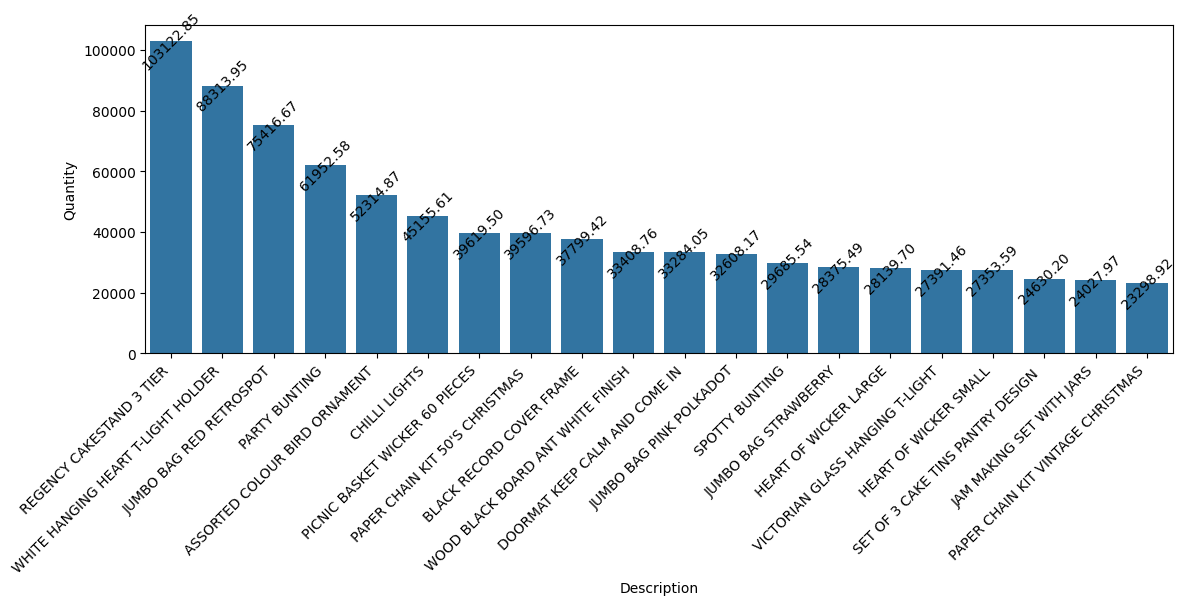

In [ ]:
# prompt: generate bar plot from df_target and value as quantity and add data labels to values rounded to 2 decimal and font 14 and rotated 45

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Description', y='Quantity', data=df_target)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', rotation=45)

plt.show()
